**1. Cargar el dataset**




In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/results.csv")

**2. Exploración inicial**

Realiza una exploración inicial del conjunto de datos para comprender su estructura. Puedes usar funciones como los siguientes:

- head()
- info()
- describe()

Esto es para obtener una vista previa de los datos.

In [6]:
print(df.head()) # Muestra las primeras filas del dataset.

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  


In [7]:
print(df.info()) # Muestra información sobre las columnas y los tipos de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41243 entries, 0 to 41242
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41243 non-null  object
 1   home_team   41243 non-null  object
 2   away_team   41243 non-null  object
 3   home_score  41243 non-null  int64 
 4   away_score  41243 non-null  int64 
 5   tournament  41243 non-null  object
 6   city        41243 non-null  object
 7   country     41243 non-null  object
 8   neutral     41243 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB
None


In [8]:
print(df.describe()) # Muestra el resumen estadístico de las columnas numéricas.

         home_score    away_score
count  41243.000000  41243.000000
mean       1.744975      1.189317
std        1.750513      1.406648
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000


**3. Limpieza de datos**

Identificamos y manejamos los valores faltantes en el conjunto de datos. En esta ocasión usaremos la función isnull() para detectar valores faltantes y luego decidir cómo tratarlos, ya sea eliminándolos o imputándolos con valores apropiados.

In [34]:
print(df.isnull().sum()) # Identifica valores faltantes por columna

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


**4. Transformación de Datos:**



In [11]:
# Convertir la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])


**5. Exploración más Detallada:**

Realiza un análisis más profundo de los datos para entender su distribución y características.

In [18]:
# Exploración de variables categóricas
print(df['tournament'].value_counts())
print("Win Home team: ",df['home_team'].nunique())
print("Win Away Team: ",df['away_team'].nunique())

Friendly                                17011
FIFA World Cup qualification             7100
UEFA Euro qualification                  2532
African Cup of Nations qualification     1624
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
AFF Championship qualification              2
Copa América qualification                  2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64
Win Home team:  310
Win Away Team:  307


# **Inferencia Frecuentista**

**Cálculo de Estadísticas Descriptivas:**

Calcular la media, la desviación estándar y otras estadísticas relevantes para comprender el rendimiento de los equipos.
python


In [19]:
# Calcular la media y desviación estándar de los puntajes de los equipos
home_mean = df['home_score'].mean()
home_std = df['home_score'].std()

away_mean = df['away_score'].mean()
away_std = df['away_score'].std()

print(f"Media de puntajes en casa: {home_mean:.2f}")
print(f"Desviación estándar de puntajes en casa: {home_std:.2f}")
print(f"Media de puntajes fuera de casa: {away_mean:.2f}")
print(f"Desviación estándar de puntajes fuera de casa: {away_std:.2f}")


Media de puntajes en casa: 1.74
Desviación estándar de puntajes en casa: 1.75
Media de puntajes fuera de casa: 1.19
Desviación estándar de puntajes fuera de casa: 1.41


**Proporciones de Victoria, Empate y Derrota:**

Calcula la proporción de partidos ganados, empatados y perdidos por cada equipo.

In [21]:
team_results = pd.concat([
    df['home_team'], df['away_team'], df['home_score'], df['away_score']], axis=1)

team_results = team_results.melt(
    id_vars=['home_team', 'away_team'], value_vars=['home_score', 'away_score'],
    value_name='score', var_name='location')

team_results['result'] = team_results['score'].apply(lambda x: 'win' if x > 0 else 'lose' if x < 0 else 'draw')

team_result_counts = team_results.groupby(['home_team', 'result'])['result'].count().unstack(fill_value=0)
team_result_proportions = team_result_counts.apply(lambda x: x / x.sum(), axis=1)

print(team_result_proportions.head())


result           draw       win
home_team                      
Abkhazia     0.361111  0.638889
Afghanistan  0.364865  0.635135
Albania      0.343931  0.656069
Alderney     0.285714  0.714286
Algeria      0.323024  0.676976


Intervalos de Confianza:

Calcula intervalos de confianza para las estadísticas calculadas (como la proporción de victorias) utilizando métodos frecuentistas.

In [23]:
import scipy.stats as stats

In [24]:
confidence_level = 0.95

# Calcular intervalos de confianza para las proporciones de victorias
conf_interval = stats.binom.interval(confidence_level, n=team_result_counts.sum(axis=1), p=team_result_proportions['win'])
team_result_proportions['win_conf_interval'] = list(zip(conf_interval[0], conf_interval[1]))

print(team_result_proportions.head())


result           draw       win win_conf_interval
home_team                                        
Abkhazia     0.361111  0.638889      (17.0, 28.0)
Afghanistan  0.364865  0.635135      (39.0, 55.0)
Albania      0.343931  0.656069    (210.0, 244.0)
Alderney     0.285714  0.714286       (7.0, 13.0)
Algeria      0.323024  0.676976    (372.0, 416.0)


Con estos pasos, habrás realizado un análisis de inferencia frecuentista sobre los resultados deportivos. Tendrás estimaciones de las estadísticas clave y habrás calculado intervalos de confianza para las proporciones de victoria, empate y derrota para cada equipo.

# **Inferencia Bayesiana**

**Definición de Creencias Previas (Priors):**

Decide qué tipo de distribuciones prior utilizar para modelar el rendimiento de los equipos. Puedes optar por distribuciones uniformes, normales u otras según tu conocimiento previo.

In [25]:
# Definir creencias previas para el rendimiento de los equipos
# Por ejemplo, asumamos una distribución normal para los puntajes de los equipos
prior_mean = 1.0  # Media prior
prior_std = 0.5   # Desviación estándar prior


**Actualización de Creencias con Datos Observados:**

Utiliza el teorema de Bayes para actualizar las creencias previas a medida que observas más resultados.

In [27]:
# Actualizar creencias previas con resultados observados (puntajes de los equipos)
# Utiliza la distribución normal conjugada para actualización bayesiana
posterior_mean = (prior_mean * prior_std ** 2 + df['home_score'].sum() + df['away_score'].sum()) / (2 * prior_std ** 2 + df.shape[0])
posterior_std = (prior_std ** 2 * df.shape[0]) / (2 * prior_std ** 2 + df.shape[0])

print(f"Media posterior: {posterior_mean:.2f}")
print(f"Desviación estándar posterior: {posterior_std:.2f}")


Media posterior: 2.93
Desviación estándar posterior: 0.25


**Generación de Intervalos de Credibilidad:**

Calcula intervalos de credibilidad para las estimaciones bayesianas. Estos intervalos reflejan la incertidumbre en las estimaciones.

In [28]:
credibility_interval = stats.norm.interval(confidence_level, loc=posterior_mean, scale=posterior_std)

print(f"Intervalo de credibilidad: {credibility_interval}")

Intervalo de credibilidad: (2.4442773127014834, 3.4242474245298378)


**Comparación de Resultados Frecuentistas y Bayesianos:**

Compara las estimaciones obtenidas mediante inferencia frecuentista con las estimaciones bayesianas y analiza cómo difieren.

In [29]:
print(f"Inferencia Frecuentista - Proporción de victorias: {team_result_proportions['win'].head()}")
print(f"Inferencia Bayesiana - Media posterior: {posterior_mean:.2f}")
print(f"Inferencia Bayesiana - Intervalo de credibilidad: {credibility_interval}")


Inferencia Frecuentista - Proporción de victorias: home_team
Abkhazia       0.638889
Afghanistan    0.635135
Albania        0.656069
Alderney       0.714286
Algeria        0.676976
Name: win, dtype: float64
Inferencia Bayesiana - Media posterior: 2.93
Inferencia Bayesiana - Intervalo de credibilidad: (2.4442773127014834, 3.4242474245298378)


Con estos pasos, habrás realizado un análisis de inferencia bayesiana sobre los resultados deportivos. Habrás definido creencias previas, actualizado estas creencias con datos observados y generado intervalos de credibilidad para las estimaciones bayesianas.

# **Comparación y Análisis**

**Comparación de Estimaciones de Rendimiento:**

- Compara las estimaciones de rendimiento obtenidas a través de la inferencia frecuentista y la inferencia bayesiana.
- Visualiza estas estimaciones para algunos equipos seleccionados.

In [30]:
import matplotlib.pyplot as plt

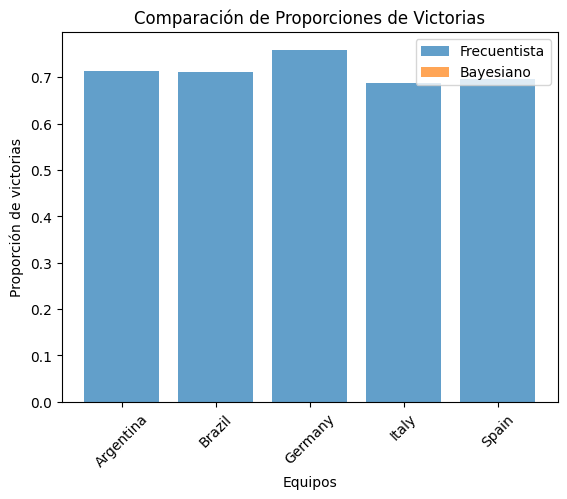

In [31]:
# Seleccionar equipos para comparar
selected_teams = ['Argentina', 'Brazil', 'Germany', 'Italy', 'Spain']

# Obtener estimaciones de rendimiento de los equipos seleccionados
selected_team_frequentist = team_result_proportions.loc[selected_teams, 'win']
selected_team_bayesian = [stats.norm.cdf(0, loc=posterior_mean, scale=posterior_std) for _ in selected_teams]

# Crear gráficos de barras comparativos
plt.bar(selected_teams, selected_team_frequentist, label='Frecuentista', alpha=0.7)
plt.bar(selected_teams, selected_team_bayesian, label='Bayesiano', alpha=0.7)
plt.xlabel('Equipos')
plt.ylabel('Proporción de victorias')
plt.title('Comparación de Proporciones de Victorias')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**Comparación de Intervalos de Confianza y Credibilidad:**

- Compara cómo se generan los intervalos de confianza en la inferencia frecuentista y los intervalos de credibilidad en la inferencia bayesiana.

In [32]:
print(f"Intervalos de confianza frecuentistas:\n{team_result_proportions['win_conf_interval'].head()}")
print(f"Intervalos de credibilidad bayesianos:\n{credibility_interval}")


Intervalos de confianza frecuentistas:
home_team
Abkhazia         (17.0, 28.0)
Afghanistan      (39.0, 55.0)
Albania        (210.0, 244.0)
Alderney          (7.0, 13.0)
Algeria        (372.0, 416.0)
Name: win_conf_interval, dtype: object
Intervalos de credibilidad bayesianos:
(2.4442773127014834, 3.4242474245298378)
